In [20]:
#all the imported modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [6]:
#csv of the data
data = pd.read_csv('Salary Data.csv')
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [7]:
#describing the data
data.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


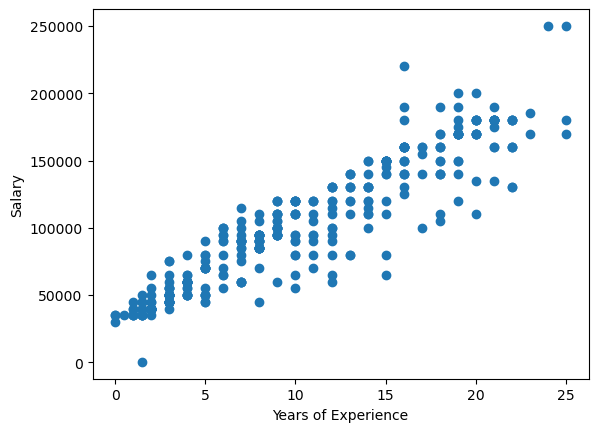

In [11]:
#plot of the data before 
plt.scatter(data['Years of Experience'],data['Salary'])
plt.ylabel('Salary')
plt.xlabel('Years of Experience')
plt.show()

In [65]:
#method to drop the nan values 
data = data.dropna()

In [66]:
#allocating the independent and dependent variable
X = data['Years of Experience']
y = data['Salary']

In [67]:
#the x matrix is single dimension so changing it to 2 dimension
x_matrix = X.values.reshape(-1,1)
y_matrix = y.values.reshape(-1,1)

In [69]:
#Linear Regresssion Model
lr = LinearRegression()

In [70]:
#fitting the data
lr.fit(x_matrix,y_matrix)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
#coefficent of regression line
lr.coef_

array([[6844.51051448]])

In [72]:
#intercept of regression line
lr.intercept_

array([31921.21691704])

In [73]:
#R2 of the data
lr.score(x_matrix,y_matrix)

0.865528278393677

In [74]:
#predicting the data using Linear Regression
y_pred = lr.predict(x_matrix)

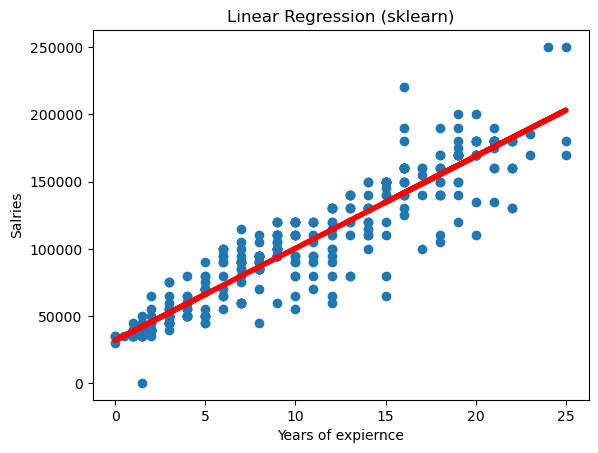

In [75]:
#Plot of the Year of Expirence Vs Salaried using sklearn
plt.title("Linear Regression (sklearn)")
plt.scatter(x_matrix,y_matrix)
plt.plot(x_matrix,y_pred,c="red",lw=4)
plt.xlabel('Years of expiernce')
plt.ylabel('Salries')
plt.show()

In [76]:
#parameterized version of regression line 
yhat = x_matrix*lr.coef_ + lr.intercept_


In [77]:
#Now Stats model for getting the summary of the data
x_sm = sm.add_constant(x_matrix)
model = sm.OLS(y_matrix,x_sm).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     2388.
Date:                Thu, 29 Jan 2026   Prob (F-statistic):          1.02e-163
Time:                        14:48:56   Log-Likelihood:                -4177.0
No. Observations:                 373   AIC:                             8358.
Df Residuals:                     371   BIC:                             8366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.192e+04   1677.842     19.025      0.000    2.86e+04    3.52e+04
x1          6844.5105    140.065     48.867      0.000    6569.089    7119.932
==============================================================================
Omnibus:                       42.211   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.478
Skew:                          -0.511   Prob(JB):                     1.14e-26
Kurtosis:                       5.577   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""